In [1]:
# 필요한 기본 모듈 임포트
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
data = pd.read_csv('./data/bank-full.csv',sep=';')

# 데이터 행,열 확인
print(data.shape)

# 결측값 확인
print(data.isnull().sum())

# 데이터 확인 
data

(45211, 17)
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [2]:
# 요약 통계량 확인
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


1) 클라이언트 데이터 분석

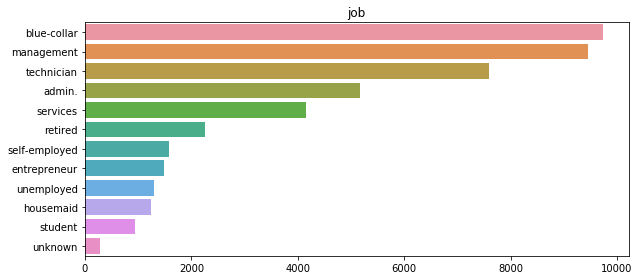

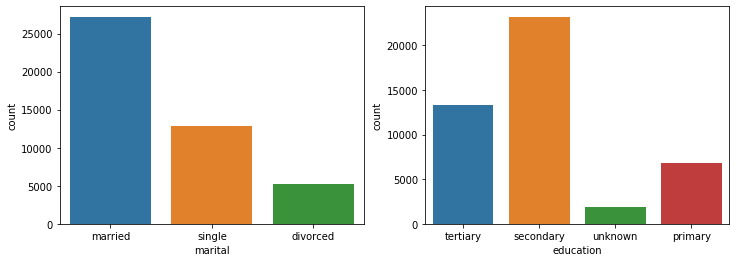

In [3]:
#job, marital, education 분석
plt.figure(figsize=(9,4))
sns.barplot(data['job'].value_counts().values, data['job'].value_counts().index)
plt.title('job')
plt.tight_layout()

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (12,4))
sns.countplot(data['marital'], ax=ax1)
sns.countplot(data['education'], ax=ax2)

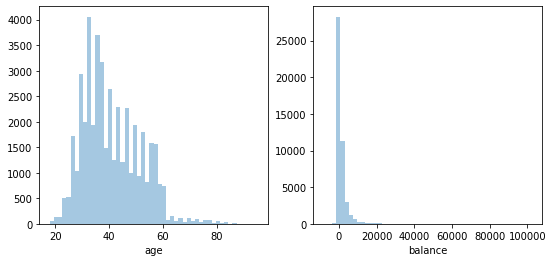

In [4]:
# age, balance 분석
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (9,4))
sns.distplot(data['age'], kde=False, ax = ax1)
sns.distplot(data['balance'], kde=False, ax = ax2)

In [5]:
# age, balance 클러스터링 - K평균 분리
from sklearn.cluster import KMeans
from sklearn import metrics

out_scaled = data.copy()
out_scaled = out_scaled[['age', 'balance']]

# 실루엣 점수로 적절한 k 값을 찾기 위해 찾기
n_clusters = [2,3,4,5]
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(out_scaled)
    cluster_labels=kmeans.predict(out_scaled)
    S = metrics.silhouette_score(out_scaled, cluster_labels)
    print("n_clusters = {:d}, silhoutte score {:1f}".format(k,S))

n_clusters = 2, silhoutte score 0.851432
n_clusters = 3, silhoutte score 0.788219
n_clusters = 4, silhoutte score 0.756758
n_clusters = 5, silhoutte score 0.719966


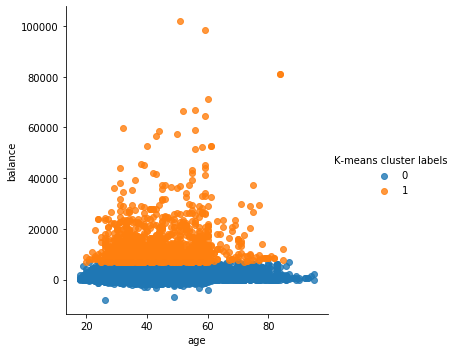

In [6]:
# 구한 k 값을 가지고 클러스터링
clus = KMeans(n_clusters=2, tol=0.04, max_iter=300)
clus.fit(out_scaled)
out_scaled['K-means cluster labels'] = clus.labels_
sns.lmplot(x='age', y='balance', hue='K-means cluster labels', data=out_scaled, fit_reg=False)

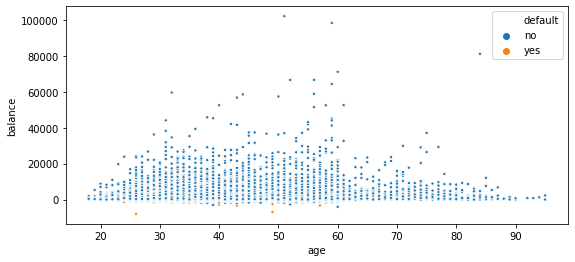

In [7]:
# 나이, 자산 별 신용불량 상태 
plt.figure(figsize=(9,4))
sns.scatterplot(x='age', y='balance', hue='default', s=10,  data=data)
plt.show()

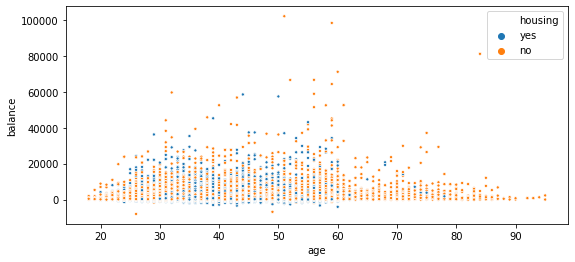

In [8]:
# 나이, 자산 별 주택 대출 여부 
plt.figure(figsize=(9,4))
sns.scatterplot(x='age', y='balance', hue='housing', s=10,  data=data)
plt.show()

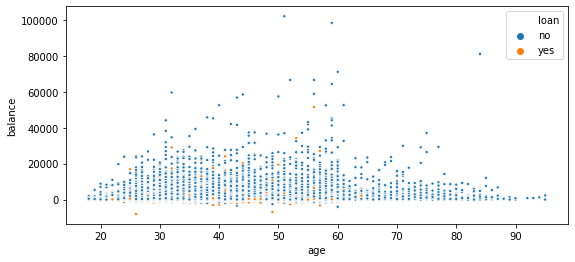

In [9]:
# 나이, 자산 별 개인 대출 여부 
plt.figure(figsize=(9,4))
sns.scatterplot(x='age', y='balance', hue='loan', s=10,  data=data)
plt.show()

2) 연락 데이터 분석

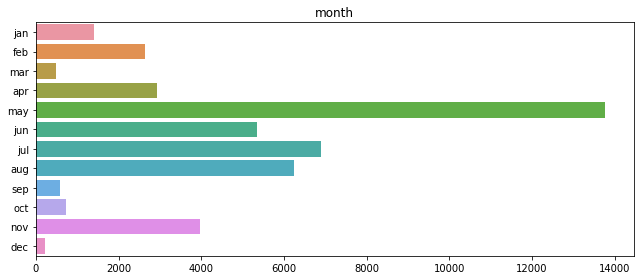

In [10]:
import calendar 

months = [month.lower() for month in list( calendar.month_abbr[1:] )]

plt.figure(figsize=(9,4))
sns.barplot(data['month'].value_counts().values, data['month'].value_counts().index,
            order = months)
plt.title('month')
plt.tight_layout()

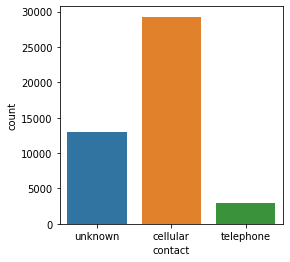

In [11]:
plt.figure(figsize=(4,4))
sns.countplot(data['contact'])
plt.show()

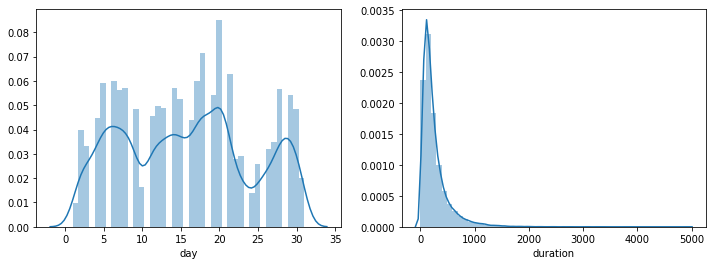

In [12]:
# day, duration 분석
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (12,4))
sns.distplot(data['day'], ax=ax1)
sns.distplot(data['duration'], ax=ax2)

3) 캠페인 관련 데이터 분석

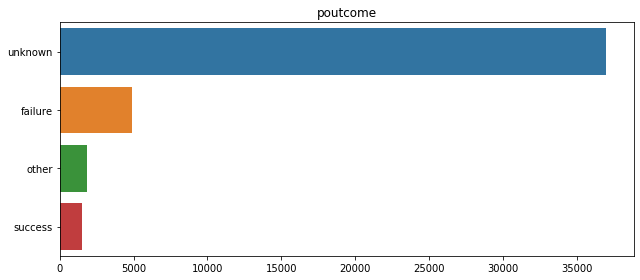

In [13]:
plt.figure(figsize=(9,4))
sns.barplot(data['poutcome'].value_counts().values, data['poutcome'].value_counts().index)
plt.title('poutcome')
plt.tight_layout()

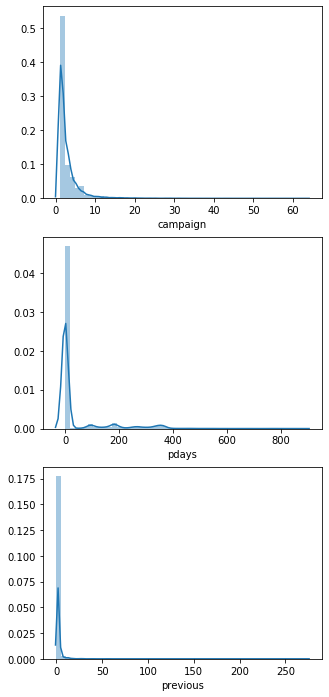

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 1, nrows = 3, figsize = (5,12))
sns.distplot(data['campaign'], ax=ax1)
sns.distplot(data['pdays'], ax=ax2)
sns.distplot(data['previous'], ax=ax3)

4) 데이터 전처리

In [15]:
# 필요한 모듈 임포트
from sklearn.preprocessing import StandardScaler

# 데이터 형 별 구분
cols_n = ['age', 'balance', 'month', 'day', 'duration', 'campaign', 'pdays', 'previous']
cols_c = ['job', 'marital', 'education', 'contact', 'poutcome']
cols_b = ['default', 'housing', 'loan', 'y']

In [16]:
# 'yes'와 'no'값만을 가지는 default, housing, loan 그리고 y 데이터를 0과 1로 바꿈
map_binary = {'no':0, 'yes':1}

for col in cols_b:
    data[col] = data[col].replace(map_binary)
    
data[cols_b]

,default,housing,loan,y
0,0,1,0,0
1,0,1,0,0
2,0,1,1,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
45206,0,0,0,1
45207,0,0,0,1
45208,0,0,0,1
45209,0,0,0,0


In [17]:
# 카테고리 데이터인 month를 숫자로 변환
months = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,'may': 5, 'jun': 6, 'jul': 7, 
          'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

data = data.replace({'month' : months})
data['month']

0         5
1         5
2         5
3         5
4         5
         ..
45206    11
45207    11
45208    11
45209    11
45210    11
Name: month, Length: 45211, dtype: int64

In [18]:
# 숫자 데이터 표준화
scaler = StandardScaler()

df_need = data[cols_n]
df_scaled = scaler.fit_transform(df_need)
df_scaled = pd.DataFrame(data = df_scaled, columns = df_need.columns, index = df_need.index)
data[cols_n] = df_scaled
data[cols_n]

,age,balance,month,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-0.475354,-1.298476,0.011016,-0.569351,-0.411453,-0.251940
1,0.288529,-0.437895,-0.475354,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.747384,-0.446762,-0.475354,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940
3,0.571051,0.047205,-0.475354,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940
4,-0.747384,-0.447091,-0.475354,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,2.016333,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,2.831227,0.120447,2.016333,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,2.925401,1.429593,2.016333,0.143418,3.373797,0.721811,1.436189,1.050473
45209,1.512791,-0.228024,2.016333,0.143418,0.970146,0.399020,-0.411453,-0.251940


In [19]:
# 카테고리 데이터 인코딩
data_encoded = pd.get_dummies(data)

features_unknown = ['education_unknown','job_unknown','contact_unknown', 'poutcome_unknown']
data_scaled = data_encoded.drop(features_unknown, axis=1)
data_scaled

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,1.606965,0,0.256419,1,0,-1.298476,-0.475354,0.011016,-0.569351,-0.411453,...,1,0,0,0,1,0,0,0,0,0
1,0.288529,0,-0.437895,1,0,-1.298476,-0.475354,-0.416127,-0.569351,-0.411453,...,0,1,0,1,0,0,0,0,0,0
2,-0.747384,0,-0.446762,1,1,-1.298476,-0.475354,-0.707361,-0.569351,-0.411453,...,1,0,0,1,0,0,0,0,0,0
3,0.571051,0,0.047205,1,0,-1.298476,-0.475354,-0.645231,-0.569351,-0.411453,...,1,0,0,0,0,0,0,0,0,0
4,-0.747384,0,-0.447091,0,0,-1.298476,-0.475354,-0.233620,-0.569351,-0.411453,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,0,-0.176460,0,0,0.143418,2.016333,2.791329,0.076230,-0.411453,...,1,0,0,0,1,1,0,0,0,0
45207,2.831227,0,0.120447,0,0,0.143418,2.016333,0.768224,-0.246560,-0.411453,...,0,0,1,0,0,1,0,0,0,0
45208,2.925401,0,1.429593,0,0,0.143418,2.016333,3.373797,0.721811,1.436189,...,1,0,0,1,0,1,0,0,0,1
45209,1.512791,0,-0.228024,0,0,0.143418,2.016333,0.970146,0.399020,-0.411453,...,1,0,0,1,0,0,1,0,0,0


In [20]:
data_scaled

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,1.606965,0,0.256419,1,0,-1.298476,-0.475354,0.011016,-0.569351,-0.411453,...,1,0,0,0,1,0,0,0,0,0
1,0.288529,0,-0.437895,1,0,-1.298476,-0.475354,-0.416127,-0.569351,-0.411453,...,0,1,0,1,0,0,0,0,0,0
2,-0.747384,0,-0.446762,1,1,-1.298476,-0.475354,-0.707361,-0.569351,-0.411453,...,1,0,0,1,0,0,0,0,0,0
3,0.571051,0,0.047205,1,0,-1.298476,-0.475354,-0.645231,-0.569351,-0.411453,...,1,0,0,0,0,0,0,0,0,0
4,-0.747384,0,-0.447091,0,0,-1.298476,-0.475354,-0.233620,-0.569351,-0.411453,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,0,-0.176460,0,0,0.143418,2.016333,2.791329,0.076230,-0.411453,...,1,0,0,0,1,1,0,0,0,0
45207,2.831227,0,0.120447,0,0,0.143418,2.016333,0.768224,-0.246560,-0.411453,...,0,0,1,0,0,1,0,0,0,0
45208,2.925401,0,1.429593,0,0,0.143418,2.016333,3.373797,0.721811,1.436189,...,1,0,0,1,0,1,0,0,0,1
45209,1.512791,0,-0.228024,0,0,0.143418,2.016333,0.970146,0.399020,-0.411453,...,1,0,0,1,0,0,1,0,0,0


In [21]:
data_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,2.112250e-16,1.000011,-2.159994,-0.747384,-0.182341,0.665225,5.091402
default,45211.0,1.802659e-02,0.133049,0.000000,0.000000,0.000000,0.000000,1.000000
balance,45211.0,1.760208e-17,1.000011,-3.081149,-0.423772,-0.300280,0.021587,33.094776
housing,45211.0,5.558382e-01,0.496878,0.000000,0.000000,1.000000,1.000000,1.000000
loan,45211.0,1.602265e-01,0.366820,0.000000,0.000000,0.000000,0.000000,1.000000
day,45211.0,1.257292e-17,1.000011,-1.779108,-0.938003,0.023260,0.624050,1.825628
month,45211.0,-5.029167e-18,1.000011,-2.136478,-0.475354,-0.060073,0.770490,2.431614
duration,45211.0,6.035001e-17,1.000011,-1.002478,-0.602517,-0.303517,0.236237,18.094700
campaign,45211.0,3.017500e-17,1.000011,-0.569351,-0.569351,-0.246560,0.076230,19.443647
pdays,45211.0,2.011667e-17,1.000011,-0.411453,-0.411453,-0.411453,-0.411453,8.297431


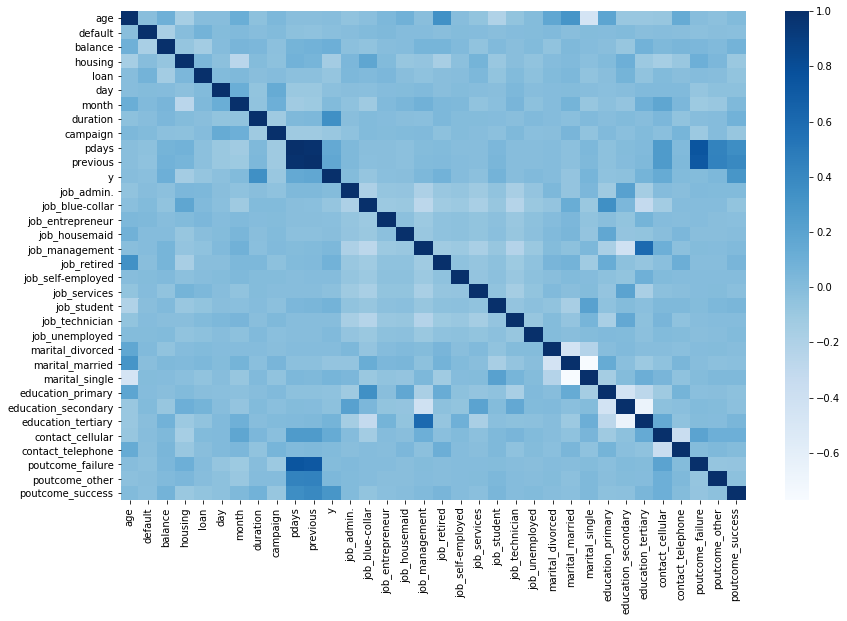

In [27]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(data_scaled.corr(method='spearman'), annot=False, cmap=plt.cm.Blues)

In [28]:
cor=data_scaled.corr()
cor_target = abs(cor['y'])
print(cor_target)

age                    0.025155
default                0.022419
balance                0.052838
housing                0.139173
loan                   0.068185
day                    0.028348
month                  0.018717
duration               0.394521
campaign               0.073172
pdays                  0.103621
previous               0.093236
y                      1.000000
job_admin.             0.005637
job_blue-collar        0.072083
job_entrepreneur       0.019662
job_housemaid          0.015195
job_management         0.032919
job_retired            0.079245
job_self-employed      0.000855
job_services           0.027864
job_student            0.076897
job_technician         0.008970
job_unemployed         0.020390
marital_divorced       0.002772
marital_married        0.060260
marital_single         0.063526
education_primary      0.040393
education_secondary    0.036388
education_tertiary     0.066448
contact_cellular       0.135873
contact_telephone      0.014042
poutcome

5) 데이터 훈련 모델 

In [29]:
# 필요한 모듈 임포트
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

y = data_scaled['y']
train = data_scaled.drop(['y'], axis=1)

# 훈련, 테스트 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=42)

In [30]:
# 로지스틱 회귀 모듈 임포트
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 분류기 초기화 및 적합
clf = LogisticRegression(penalty='l2', C=0.5)
clf.fit(X_train,y_train)

# 테스트 데이터의 레이블 예측
y_pred = clf.predict(X_test)

# f1_score, accuracy 계산
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(str(f1))
print(str(accuracy))

0.43561076604554866
0.8995134178708346


C:\Users\gksml\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
# 서포트 벡터 머신 - 선형 SVM 모델
from sklearn.svm import SVC

# SVC 초기화 및 적합
clf_lin = SVC(kernel='linear', C=0.5)
clf_lin.fit(X_train, y_train)

y_pred = clf_lin.predict(X_test)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(str(f1))
print(str(accuracy))

0.2901504124211548
0.8921409613683279


In [32]:
# 서포트 벡터 머신 - 가우시안 커널 SVM 모델
clf_rbf = SVC(kernel='rbf', C=0.5)
clf_rbf.fit(X_train, y_train)

y_pred = clf_rbf.predict(X_test)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(str(f1))
print(str(accuracy))

0.4157063593683312
0.8990710704806841


In [33]:
# 서포트 벡터 머신 - 시그모이드 커널 SVM 모델
clf_sig = SVC(kernel='sigmoid', C=0.5)
clf_sig.fit(X_train, y_train)

y_pred = clf_sig.predict(X_test)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(str(f1))
print(str(accuracy))

0.28617675623179023
0.8374373341197286


In [34]:
# 서포트 벡터 머신 - 다항식 커널 SVM 모델
clf_poly = SVC(kernel='poly', C=0.5)
clf_poly.fit(X_train, y_train)

y_pred = clf_poly.predict(X_test)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(str(f1))
print(str(accuracy))

0.3719457013574661
0.897670303745208


In [35]:
# 트리기반 분류 - 의사 결정 트리
from sklearn.tree import DecisionTreeClassifier

# 의사 결정 트리 객체 초기화 및 적합
clf_tree = DecisionTreeClassifier(max_depth=6, random_state=42)
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(str(f1))
print(str(accuracy))

0.4690978886756238
0.8980389265703332


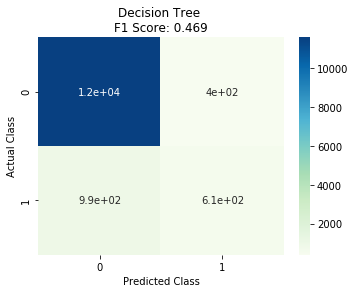

In [36]:
# 오류행렬 플롯 그리기
from sklearn.metrics import confusion_matrix

# confusion matrix 생성
cm = confusion_matrix(y_test, y_pred)
# 첫번째 인수가 true label, 두번째 인수가 예측된 label

# 판다스 데이터프레임 만들고 클래스에 넣기
labels = ['0','1']
df_cm = pd.DataFrame(cm, index = labels, columns = labels)

# confusion 시각화
plt.figure(figsize=(5.5, 4))
sns.heatmap(df_cm, cmap = "GnBu", annot=True)

# 그림 제목과 축 레이블 지정
plt.title("Decision Tree \nF1 Score:{0: .3f}".format(f1_score(y_test, y_pred)))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

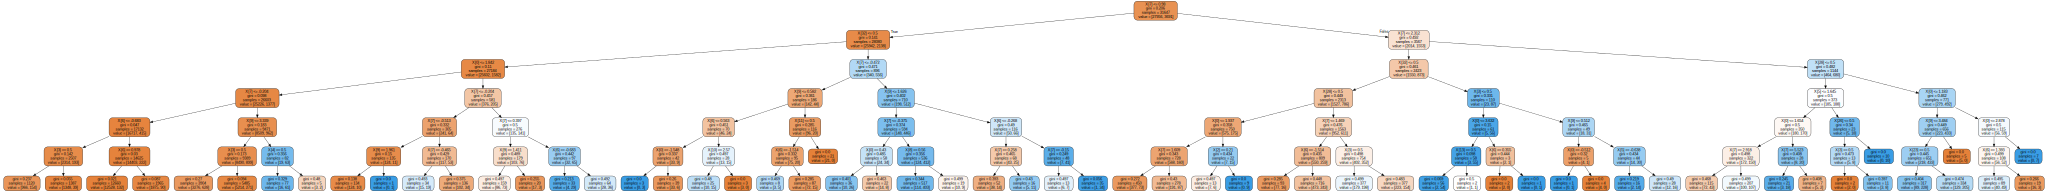

In [37]:
# 의사 결정 트리 시각화
from sklearn.tree import export_graphviz

export_graphviz(
            clf_tree, 
            out_file='tree.dot',
            rounded=True,
            filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='tree', cleanup=True)
dot

In [38]:
# 트리기반 분류 - 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 분류기 객체 초기화 및 적합
clf_r_tree = RandomForestClassifier(max_depth=6, n_estimators=10, max_features='sqrt', random_state=42, 
                                    oob_score=True)
clf_r_tree.fit(X_train,y_train)

y_pred = clf_r_tree.predict(X_test)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(str(f1))
print(str(accuracy))

# OOB를 통한 검증
oob_score = clf_r_tree.oob_score_
print('OOB score is = ' + str(oob_score))

0.29338637493784187
0.8952373930993807
OOB score is = 0.8960722975321516


C:\Users\gksml\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\gksml\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
# 훈련, 테스트 데이터셋 분리 
X_train_full, X_test, y_train_full, y_test = train_test_split(train, y, test_size=0.3, random_state=42)

# 검증 데이터 분리
X_train, X_valid = X_train_full[:5000], X_train_full[5000:]
y_train, y_valid = y_train_full[:5000], y_train_full[5000:]

In [41]:
# 이진 분류를 위한 MLP
from keras.models import Sequential
from keras.layers import Dense, Dropout

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

# 모델 구성
model = Sequential()
model.add(Dense(300, input_dim=33, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

# 모델 학습과정 설정
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=128)

# 모델 평가
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
print(loss_and_metrics)

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               10200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,401
Trainable params: 40,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5000/5000 [==============================] - 0s 71us/step - loss: 0.3356 - accuracy: 0.8776
Epoch 2/20
50